In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("mt_test.matrix.csv", header=0, index_col=0)

In [7]:
df.to_csv("./phylogenetictree/mt_test.matrx.csv", sep = " ", header=None, index=None)

In [12]:
with open("./phylogenetictree/mt_test.matrix.geneNames", 'w') as fp:
    for genename in df.index:
        fp.write(genename + '\n')

In [17]:
D_names = dict(zip(range(len(df.index)), df.index.tolist()))

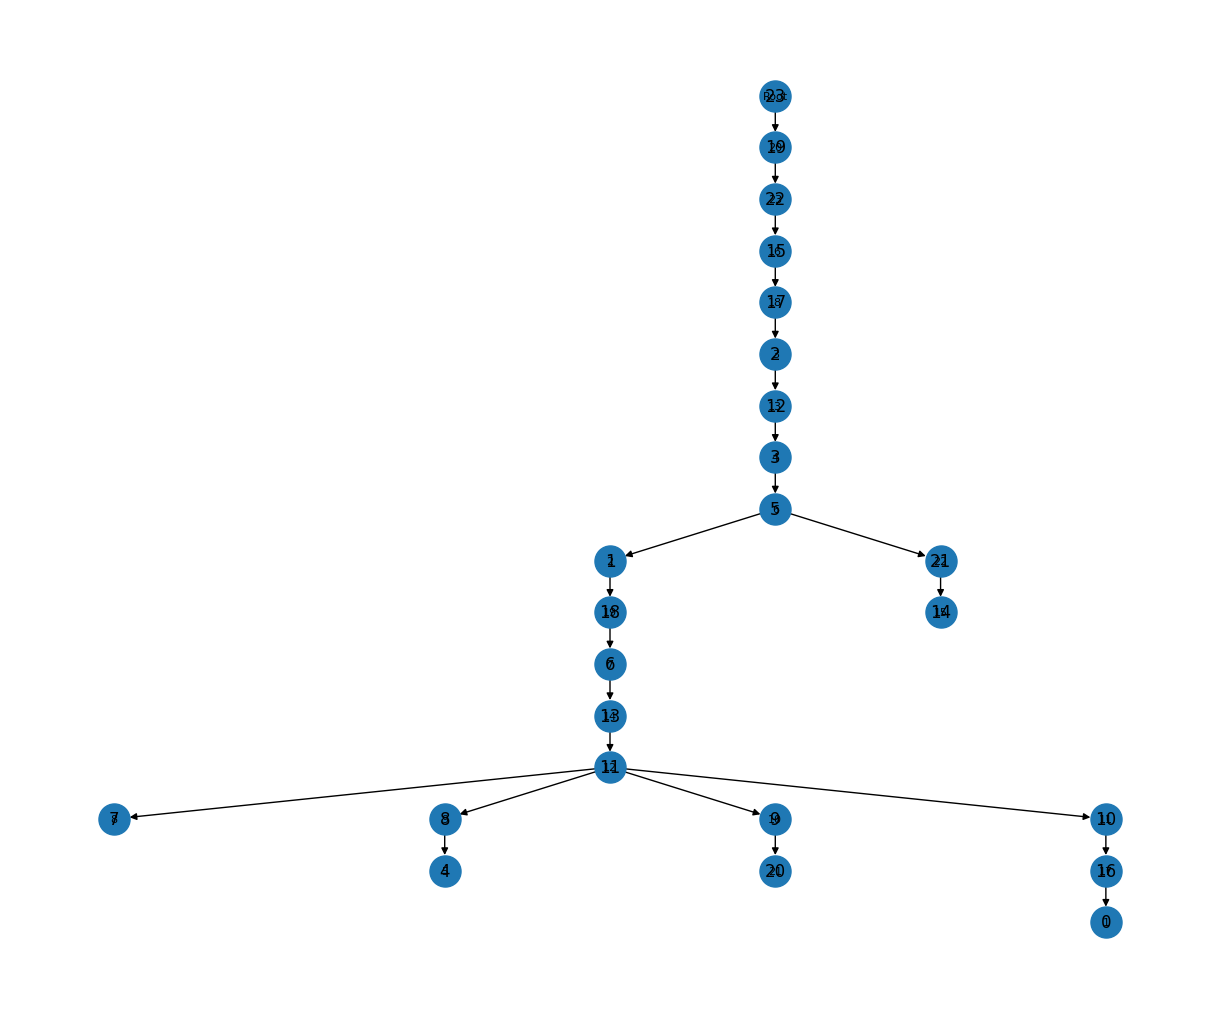

In [33]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

# Read the graph from the .gv file
G = nx.nx_agraph.read_dot('./phylogenetictree/mt_test_ml0.gv')

# Create a layout using Graphviz
pos = graphviz_layout(G, prog='dot')  # 'dot', 'neato', 'fdp', 'circo', etc.

# Draw the graph
labels = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=500)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.savefig('graph_visualization.png')
plt.show()

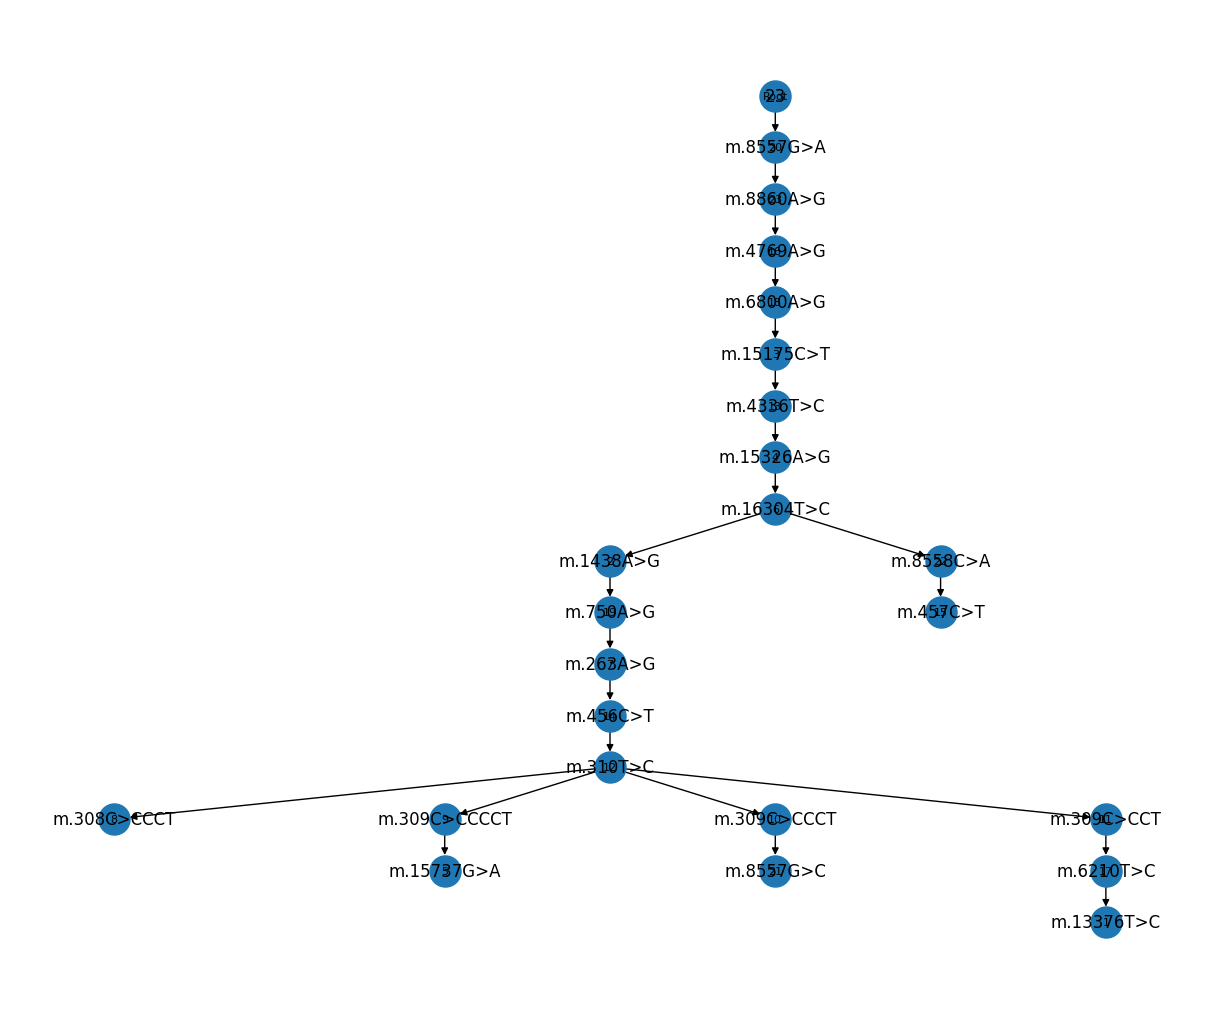

In [35]:
mapping = {}
for node in G.nodes():
    try:
        node_idx = int(node)
        if node_idx in D_names:
            mapping[node] = D_names[node_idx]
    except (ValueError, TypeError):
        # Keep original label if not in D_names
        pass

# Create a new graph with relabeled nodes
G_relabeled = nx.relabel_nodes(G, mapping)

# Create a layout using Graphviz
pos = graphviz_layout(G_relabeled, prog='dot')  # 'dot', 'neato', 'fdp', 'circo', etc.

# Draw the graph
labels = nx.get_node_attributes(G_relabeled, 'label')
plt.figure(figsize=(12, 10))
nx.draw(G_relabeled, pos, with_labels=True, arrows=True, node_size=500)
nx.draw_networkx_labels(G_relabeled, pos, labels=labels, font_size=8)

plt.savefig('graph_visualization.png')
plt.show()

In [31]:
# for node in G.nodes:
#     print(node)

In [28]:
len(df.index)

23